In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.read_csv("../data/raw/Student_Performance.csv")
df = df.drop(columns = ["overall_score", "final_grade"])
df


,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,12047,17,female,public,phd,1.8,55.2,yes,15-30 min,no,mixed,55.8,48.5,46.7
24996,1102,16,female,private,diploma,2.7,97.1,yes,<15 min,no,coaching,64.8,48.2,52.3
24997,4422,19,other,private,post graduate,1.0,63.0,yes,<15 min,no,group study,50.5,20.3,36.1
24998,7858,14,male,private,diploma,1.0,69.4,yes,15-30 min,yes,group study,13.0,34.2,7.3


## Handling Outliers and Duplicated Rows

In [213]:
# Dropped the duplicated rows
df = df.drop_duplicates()

# No outliers



## Graphs and Correlations 

### Heat Map

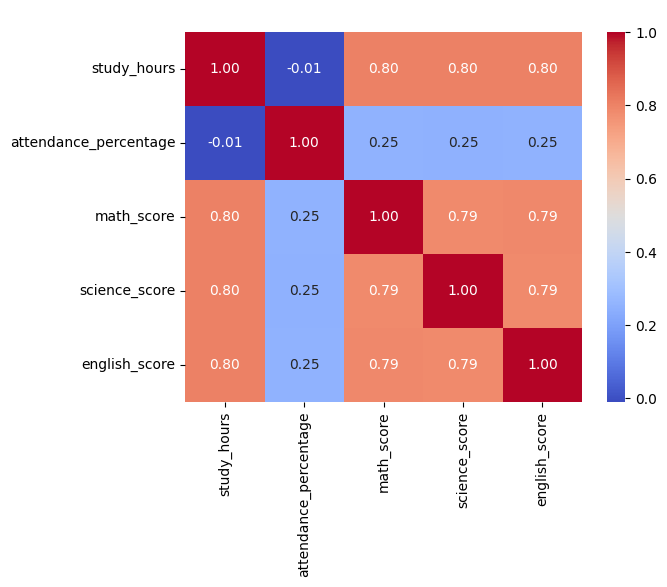

C:\Users\asus\AppData\Local\Temp\ipykernel_7588\2283638725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_score"] = df[["math_score","science_score","english_score"]].mean(axis=1).round(2)


In [214]:
numerical_col = df.select_dtypes(include="number").drop(columns= ["student_id","age"])
corr_matrix = numerical_col.corr()

sns.heatmap(corr_matrix,cmap="coolwarm",annot=True, fmt = ".2f")
plt.title(" ")
plt.show()

df["avg_score"] = df[["math_score","science_score","english_score"]].mean(axis=1).round(2)
df = df.drop(columns = ["math_score","science_score","english_score"])

### Pair Plot

In [215]:
# sns.pairplot(numerical_col)

In [216]:
vif_data = pd.DataFrame()

x_const = add_constant(numerical_col)
vif_data["numerical"] = numerical_col.columns

vif_data["VIF"] = [variance_inflation_factor(x_const.values, i+1) for i in range(len(numerical_col.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

df = df.drop(columns=["study_hours","student_id","age"])
df

               numerical       VIF
0            study_hours  5.512298
4          english_score  3.914818
2             math_score  3.888433
3          science_score  3.876294
1  attendance_percentage  1.466809


,gender,school_type,parent_education,attendance_percentage,internet_access,travel_time,extra_activities,study_method,avg_score
0,male,public,post graduate,84.3,yes,<15 min,yes,notes,51.70
1,female,public,graduate,87.8,yes,>60 min,no,textbook,63.73
2,female,private,post graduate,65.5,no,<15 min,no,notes,86.33
3,other,public,high school,58.1,no,15-30 min,no,notes,42.20
4,female,public,high school,61.0,yes,30-60 min,yes,group study,23.87
...,...,...,...,...,...,...,...,...,...
14995,male,private,graduate,53.2,yes,15-30 min,no,group study,33.67
14996,other,private,diploma,63.5,no,<15 min,yes,mixed,82.60
14997,male,private,phd,58.2,yes,30-60 min,no,group study,66.77
14998,other,private,graduate,68.7,yes,30-60 min,yes,textbook,32.03
